# Auto Insurance Regression

Zbiór danych opisuje szwedzkie ubezpieczenia samochodowe. Istnieje pojedyncza wyjaśniająca, która jest liczbą szkód, a zmienną wyjaśnianą jest łączna kwota wypłat za szkody w tysiącach szwedzkich koron. Celem jest przewidywanie łącznej kwoty wypłat na podstawie liczby zgłoszonych szkód.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
dane = pd.read_csv("data/auto-insurance.csv", header=None, names=['nr_claims', 'payment'])
dane

,nr_claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [2]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nr_claims  63 non-null     int64  
 1   payment    63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [3]:
dane.describe()

,nr_claims,payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Rozkłady obu zmiennych mają mocno skośny rozkład (niesymetryczny) co może utrudniać zadanie modelowania, rozwiążemy ten problem później

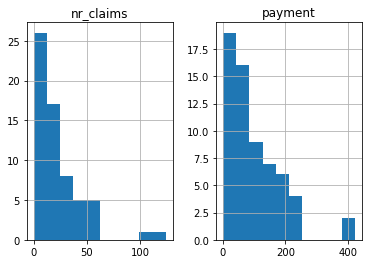

In [4]:
dane.hist()
plt.show()

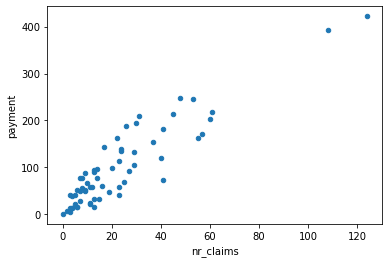

In [5]:
dane.plot.scatter(x='nr_claims', y='payment')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = dane["nr_claims"].values, dane.payment.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=222)

In [23]:
from sklearn.linear_model import LinearRegression

# ZADANIE: Zbuduj model regresji liniowej i sprawdź błąd absolutny dla zbioru testowego
lm = LinearRegression().fit(X_train.reshape(-1, 1), y_train)
yhat = lm.predict(X_test.reshape(-1, 1))
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

MAE: 28.061


In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# ZADANIE: Stwórz model z jedną warstwą ukrytą z 10 neuronami, aktuwacją 'relu' oraz kernel_initializer='he_normal'
model = Sequential()
model.add(Dense(units=10, activation='relu', kernel_initializer='he_normal', input_shape=(1,)))
model.add(Dense(1))
# ZADANIE: Skompiluj model z 'mse' jako funkcją straty i optymalizatorem 'adam'
model.compile(optimizer='adam', loss='mse')

In [32]:
# ZADANIE: Wytrenuj model ustawiając 100 epok, batch size 8 i validation_data=(X_test, y_test)
history=model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 0s 19ms/step - loss: 1564.8047 - val_loss: 1830.8744
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1549.6647 - val_loss: 1801.9592
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 1534.9341 - val_loss: 1781.9463
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 1523.6028 - val_loss: 1763.2776
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1511.2136 - val_loss: 1745.7440
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 1501.1992 - val_loss: 1727.4539
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 1490.0967 - val_loss: 1711.2180
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 1481.1334 - val_loss: 1695.9954
Epoch 9/100
6/6 [==============================] - 0s 10ms/step - loss: 1473.5604 - val_loss: 1681.0612
Epoch 10/100
6/6 [==============================] - 0s 11ms/step

6/6 [==============================] - 0s 11ms/step - loss: 1340.7682 - val_loss: 1530.6416
Epoch 80/100
6/6 [==============================] - 0s 12ms/step - loss: 1340.6182 - val_loss: 1530.5553
Epoch 81/100
6/6 [==============================] - 0s 12ms/step - loss: 1340.3121 - val_loss: 1531.3988
Epoch 82/100
6/6 [==============================] - 0s 11ms/step - loss: 1339.1006 - val_loss: 1532.6490
Epoch 83/100
6/6 [==============================] - 0s 11ms/step - loss: 1338.6752 - val_loss: 1533.2126
Epoch 84/100
6/6 [==============================] - 0s 11ms/step - loss: 1338.1464 - val_loss: 1534.1908
Epoch 85/100
6/6 [==============================] - 0s 11ms/step - loss: 1341.6910 - val_loss: 1536.8955
Epoch 86/100
6/6 [==============================] - 0s 11ms/step - loss: 1337.3191 - val_loss: 1537.1414
Epoch 87/100
6/6 [==============================] - 0s 11ms/step - loss: 1337.2322 - val_loss: 1537.6289
Epoch 88/100
6/6 [==============================] - 0s 11ms/step - l

In [33]:
yhat = model.predict(X_test)
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

1/1 [==============================] - 0s 22ms/step
MAE: 31.748


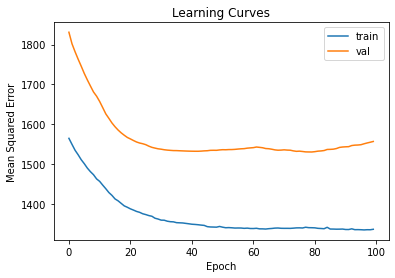

In [34]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Dokonamy teraz transformacji predyktora i zmiennej odpowiedzi i sprawdzimy czy polepszyło to naszą predykcję.

In [35]:
X_train, X_test = y_train.reshape((len(X_train),1)), y_test.reshape((len(X_test),1))
y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))

In [36]:
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [37]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(1,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
6/6 [==============================] - 1s 33ms/step - loss: 0.2923 - val_loss: 0.4171
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.2594 - val_loss: 0.3641
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2292 - val_loss: 0.3129
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2010 - val_loss: 0.2694
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1741 - val_loss: 0.2307
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1513 - val_loss: 0.1945
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1281 - val_loss: 0.1633
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1094 - val_loss: 0.1333
Epoch 9/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0912 - val_loss: 0.1081
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0759 - val_loss: 0.0884
Epoch 11/200
6/6 [=

Epoch 84/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 85/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 86/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 87/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 88/200
6/6 [==============================] - 0s 11ms/step - loss: 9.6771e-04 - val_loss: 0.0013
Epoch 89/200
6/6 [==============================] - 0s 10ms/step - loss: 9.2611e-04 - val_loss: 0.0012
Epoch 90/200
6/6 [==============================] - 0s 11ms/step - loss: 8.8675e-04 - val_loss: 0.0011
Epoch 91/200
6/6 [==============================] - 0s 12ms/step - loss: 8.4572e-04 - val_loss: 0.0011
Epoch 92/200
6/6 [==============================] - 0s 11ms/step - loss: 8.0443e-04 - val_loss: 0.0011
Epoch 93/200
6/6 [==============================] - 0s 11ms/step - loss: 7.7005e-04 - val

6/6 [==============================] - 0s 12ms/step - loss: 1.4407e-05 - val_loss: 1.8661e-05
Epoch 161/200
6/6 [==============================] - 0s 12ms/step - loss: 1.3474e-05 - val_loss: 1.7681e-05
Epoch 162/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2495e-05 - val_loss: 1.6585e-05
Epoch 163/200
6/6 [==============================] - 0s 12ms/step - loss: 1.1602e-05 - val_loss: 1.5135e-05
Epoch 164/200
6/6 [==============================] - 0s 12ms/step - loss: 1.0669e-05 - val_loss: 1.4018e-05
Epoch 165/200
6/6 [==============================] - 0s 10ms/step - loss: 9.8673e-06 - val_loss: 1.3317e-05
Epoch 166/200
6/6 [==============================] - 0s 12ms/step - loss: 9.0522e-06 - val_loss: 1.2756e-05
Epoch 167/200
6/6 [==============================] - 0s 12ms/step - loss: 8.5135e-06 - val_loss: 1.2275e-05
Epoch 168/200
6/6 [==============================] - 0s 11ms/step - loss: 7.8623e-06 - val_loss: 1.1004e-05
Epoch 169/200
6/6 [=======================

In [38]:
yhat = model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
yhat = pt2.inverse_transform(yhat)
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

1/1 [==============================] - 0s 63ms/step
MAE: 0.042


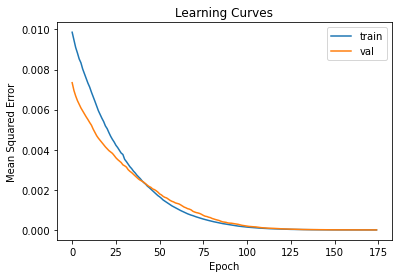

In [40]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'][25:], label='train')
plt.plot(history.history['val_loss'][25:], label='val')
plt.legend()
plt.show()

Zauważmy, że dzięki transformacjom udało nam się znacząco zmniejszyć błąd!

In [44]:
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

kfold = KFold(10)
scores = list()
for train_ix, test_ix in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    
    X_train, X_test = y_train.reshape((len(X_train),1)), y_test.reshape((len(X_test),1))
    y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))
    
    pt1 = PowerTransformer()
    pt1.fit(X_train)
    X_train = pt1.transform(X_train)
    X_test = pt1.transform(X_test)
    pt2 = PowerTransformer()
    pt2.fit(y_train)
    y_train = pt2.transform(y_train)
    y_test = pt2.transform(y_test)
    
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)
    
    yhat = model.predict(X_test)
    y_test = pt2.inverse_transform(y_test)
    yhat = pt2.inverse_transform(yhat)
    
    score = mean_absolute_error(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

1/1 [==============================] - 0s 59ms/step
>50.849
1/1 [==============================] - 0s 53ms/step
>7.657
1/1 [==============================] - 0s 54ms/step
>8.536
1/1 [==============================] - 0s 66ms/step
>1.999
1/1 [==============================] - 0s 60ms/step
>5.823
1/1 [==============================] - 0s 52ms/step
>9.841
1/1 [==============================] - 0s 71ms/step
>9.529
1/1 [==============================] - 0s 52ms/step
>14.664
1/1 [==============================] - 0s 54ms/step
>0.610
1/1 [==============================] - 0s 60ms/step
>0.002
Mean MAE: 10.951 (13.996)
